# Darwin Plays Super Mario Bros
### *Training A Reward-Based Machine Learning Model to Play Classic Video Games*

**Author:** Xander Carroll    
**Course:** Physics 5680, Autumn 2025  
**Date:** December 16, 2025

**Project Repository:** [Link](https://github.com/Xander-Carroll/PHYSICS5680-Neural-Network-Final)
&nbsp;

<small>*I used GPT-5 mini to help craft several paragraphs of text throughout this notebook.*</small>

---

## Abstract


Classic video games offer a controlled and well-understood environment for experimenting with machine learning, providing clear objectives and measurable rewards without the complexity of modern games. This project will explore training a reward-based neural network to play Super Mario Bros on the Nintendo Entertainment System (NES). The game state will be extracted using an NES emulator and encoded into a representation suitable for a neural network. The network will then be trained to maximize in-game rewards such as level progress and the level timer. It is anticipated that this approach will demonstrate how simple, reward-driven models can learn effective strategies in constrained environments.

---

## 1. Introduction

### Problem Description
Developing artificial agents that can learn to play video games has long been a benchmark problem in machine learning and artificial intelligence. While modern games offer highly complex environments, classic games like Super Mario Bros for the Nintendo Entertainment System (NES) provide simpler, well-defined environments where objectives, rewards, and state representations are clear. The problem we aim to solve is training a reward-based neural network to play Super Mario Bros, using in-game feedback to guide learning. This requires designing a system that can interpret the game state, map it into a format suitable for a neural network, and optimize agent behavior to choose the controller inputs that will maximize cumulative rewards.

### Motivation
This project advances research in reinforcement learning by testing how reward-based neural networks can learn behavior in simple, well-defined environments. Classic games like Super Mario Bros provide an ideal platform for such experiments. It is easy to simulate, has clear objectives, and still requires sequential decision-making and adaptation. By evolving a neural network to play the game using only in-game rewards as feedback, this project explores how complex behavior can emerge from simple fitness functions.

### Background
Our primary environment is the NES version of [Super Mario Bros](https://en.wikipedia.org/wiki/Super_Mario_Bros).$`^1`$ This game is one of the most popular from its era, has been reverse engineered, and is very well documented by the community. Super Mario Bros is a side-scrolling platformer. The player's goal is to make forward progress, eventually reaching the end of the level while avoiding hazards. The [BizHawk](https://tasvideos.org/Bizhawk) NES emulator will be used to provide a programmatic interface to read the game's memory and feed controller inputs to the game in real-time.$`^2`$ This will allow the neural network to "see" and "interact" with the game. The problem is framed as a reward-based learning task, where the agent receives feedback proportional to in-game progress, creating a natural fitness function for optimization.

### Inputs and Outputs
Input(s): The algorithm will recieve the current game state from the BizHawk emulator. This will include a map of the level, with terrain layout, enemy locations, and the player's current progress. This information will be encoded into a representation suitable for neural network processing.

Output(s): The network will produce a set of controller inputs (e.g., hold left, press button A) to be executed in the game environment. Eventually, we expect these controller outputs to maximize the fitness function (player's foward progress in the level). 

### Project Goals

1. **Primary Goal:**
Train a fitness-based neural network to autonomously play Super Mario Bros and achieve measurable progress through one or more levels. The primary metric is maximizing cumulative in-game reward, including level completion.

1. **Stretch Goal:**
Extend the model to generalize across multiple levels or similar games. This will include testing whether a network trained on one level can adapt to unseen layouts.

---

## 2. Related Work

**Source 1:**

*Stanley, Kenneth O., and Risto Miikkulainen. "Evolving neural networks through augmenting topologies." Evolutionary computation 10.2 (2002): 99-127.*

This is one of the early papers describing NEAT (NeuroEvolution of Augmenting Topologies). The NEAT algorithim not only adjusts the weights of connections in neural networks, but also their topologies (the nodes and connections in the network). The network starts with no hidden nodes, and over time will evolve to add them.

**Source 2:**

*Sethbling. “MarI/O - Machine Learning for Video Games.” YouTube, YouTube, www.youtube.com/watch?v=qv6UVOQ0F44. Accessed 13 Nov. 2025.*

This project directly inspired my own work. It applies NEAT to train an artificial neural network to play Super Mario World for the Super Nintendo Entertainment System. The system evaluates agents based on a fitness function that rewards forward progress and then breeds the best performers to produce increasingly complex behavior over successive generations.

**Source 3:**

*Mnih, Volodymyr, et al. "Playing atari with deep reinforcement learning." arXiv preprint arXiv:1312.5602 (2013).*

This paper presents the Deep Q‑Network (DQN) approach, where a convolutional neural network is trained with Q‑learning from raw pixel input to play multiple Atari 2600 games. 

**Source 4:**

*Chrispresso. “Ai Learns to Play Super Mario Bros Using a Genetic Algorithm and Neural Network.” Chrispresso, 14 Mar. 2020, chrispresso.github.io/AI_Learns_To_Play_SMB_Using_GA_And_NN. *

This project uses Deep Q learning to evolve a neural network capable of playing "Super Mario Bros" on the NES. Instead of training through gradient descent, the model’s weights are optimized using a fitness score that rewards progress and survival.

<br/>

**Strengths and Weaknesses:**

I now have two sources using the NEAT algorithim, and two sources using the Q-Learning algorthim. In both cases, I have a paper detailing the aproach, and a project where the technique is applied to a Mario game.

The NEAT-based approaches are simple and can be implemented from scratch, while the Q-Learning approaches will need to be implemented using a library like Tensorflow. However, deep learning libraries tend to have abundant documentation for use in python projects.

<br/>

**The Two Approaches and State of the Art:**

Modern state-of-the-art videogame playing agents tend to use deep learning methods such as DQN, which reliably learn from raw pixels using stable training techniques. Neuroevolution remains popular for small environments and hobbyist projects, especially when reward shaping or topology discovery is important. The related Mario projects are not state-of-the-art, and show both styles applied in practice.

---

## 3. Ethical Considerations

Because this project uses a self-contained video game environment, the ethical concerns are relatively minimal compared to many real-world machine learning applications. The data used to train the model comes entirely from the "Super Mario Bros" game itself. This means there is no personal, demographic, or sensitive data involved, and thus no risk of violating data privacy or introducing human-related bias. The training process is purely synthetic, relying on game-generated feedback rather than external datasets.

Potential misuse is also limited, as the model is designed for research and educational purposes. However, as with many AI techniques, the underlying algorithms (Deep Q-Learning and NEAT) could theoretically be adapted for automation or control systems in other domains, where ethical considerations such as fairness, accountability, or safety would become more significant.

---

## 4. Project Setup and Imports

### 4.1. Key Libraries

Below is a brief description of the primary Python packages that will be used in this project.

  * **pandas:** Used for data manipulation and analysis. It provides powerful data structures, like the DataFrame, for handling and exploring structured data.
  * **numpy:** The fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
  * **matplotlib:** This library is for data visualization. Matplotlib is a comprehensive library for creating static visualizations, while Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
  * **TensorFlow:** An end-to-end open-source platform for machine learning, specializing in deep learning. It is used for building and training neural networks for tasks like image classification, natural language processing, and more.


In [2]:
# Import all necessary standard libraries here
import os, csv, sys, math, socket

# Import all necessary external libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configure plots for readability
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

### 4.2. Version Information


In [3]:
# Print version information
from numpy import __version__ as np_version
from pandas import __version__ as pd_version
from matplotlib import __version__ as mpl_version

print(f"python version: {sys.version}")
print(f"numpy version: {np_version}")
print(f"pandas version: {pd_version}")
print(f"matplotlib version: {mpl_version}")

python version: 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]
numpy version: 2.1.3
pandas version: 2.3.3
matplotlib version: 3.10.7


---

## 5. The Dataset

**Description:**

The dataset for this project is not a static collection, but a stream of real-time input vectors extracted from the NES game "Super Mario Bros." as it runs inside the BizHawk emulator. Each sample corresponds to a single game frame and consists of a simple encoding for the state of the level.

Because the game runs at 60 frames per second, the agent will generate tens or hundreds of thousands of frames through its own gameplay attempts, which serve as the training data. Because the agent continuously produces new states through exploration, the traditional split into training, validation, and test sets does not directly apply. Instead, the "training" set will be the ammount of frames the agent spends learning the game, while the "testing" set is given by releasing the final agent to play various levels.

**Data Spesifics:**

The data is very simple. Each frame, N blocks around the player are represented with a state vector. The vector encodes "air" as zeros, "tiles" as ones, and "enemies" as negative ones. Later, additional information might be included in this vector, such as mario's position, the level timer, or the score.

**Preprocessing:**

All preprocessing occurs inside a Lua script running in BizHawk. The script reads specific memory addresses each frame (e.g., Mario’s position, tile map contents, and enemy locations) using the emulator’s API. These values are packaged into a compact vector representation of the current world state. An example of this encoding with N=6 (6 tiles of "vision" in any direction from the player) are shown below. In the second case, a red box is drawn with N=6 tiles around the player.

The Lua script then transmits each state vector to a Python backend via TCP, where it will be fed directly into the Q-learning model.

**Source:**

The dataset originates entirely from gameplay in Super Mario Bros (Nintendo, 1985) executed within the BizHawk open-source emulator. Data is collected from RAM while the game is being played.




Level 1 - Still Frame             |  Level 1 - Vector Encoding
:-------------------------:|:-------------------------:
![](img/level-1.png)  |  ![](img/matrix-1.png)


Level 2 - Still Frame             |  Level 2 - Vector Encoding
:-------------------------:|:-------------------------:
![](img/level-2.png)  |  ![](img/matrix-2.png)



**Data Extraction Script:**

The following *lua* script will be used with the *BizHawk* emulator to extract data from the game each frame. It will then send the data to a TCP server. This will allow us to interact with the data using python. 

---

## 6. Methods

### 6.1 Deep Q-Learning (DQN)
The basic idea of Deep-Q-Learning is to train an agent to choose actions that maximize long-term reward. Instead of manually programming rules for how Mario should behave, the algorithm learns by playing the game and gradually estimating the "reward" that will be generated by taking different actions in a specific state.

This reward is quantified by the Q-function $Q(S,A)$. This function answers the question, *if the agent takes action A in state S, how much total reward should it expect?* Classic Q-Learning uses a lookup table, but for games like *Super Mario Bros.*, there are too many possible input states to build a table for them all. So we will use Deep Q-Learning which replaces the table with a neural network that *approximates* the Q-function, allowing the agent to generalize in situations that the programmer hasn't seen. The following image highlights these differences:

<div style="text-align: center;">
<img src="img/q-learning-1.png">

<small><cite>Figure from: https://www.researchgate.net/figure/Q-Learning-vs-Deep-Q-Learning-Difference-in-the-agents-brain-In-Q-learning-the_fig4_382675650</cite>.$`^3`$</small>

</div>


TensorFlow will handle the neural network that approximates this Q-function. On each frame, the model receives a state vector. It will then output a predicted Q-value for each action (each button on the controller). Actions with the highest predicted reward values will be selected. As the agent plays, it will store its past experiences, and use them to train the neural network. Many different kinds of neural networks can be used as a Q function, but convolutional neural networks (CNNs) are a common option. 

<br/>

### 6.2 Convolutional Neural Network (CNN)
While CNNs are not used in every DQN implementation, they provide a helpful way to understand how the algorithim typically processes game data.

A CNN works by finding patterns in structured data, especially image vectors like the one extracted from *Super Mario Bros*. Instead of connecting every tile to every neuron, a CNN uses a sliding kernel that moves across the input in order to detect features of the image.

In the broader DQN application, CNNs are used as a Q function. Each frame of the game can be processed by the CNN, and that network can be used to predict the outcomes of different actions. A loss function will then measure how correct that prediction was, and backpropogation will be used to update each parameter in the network.

Because CNNs are not the focus of the project, this summary was rather concise. For more information, see [this](https://www.geeksforgeeks.org/deep-learning/convolutional-neural-network-cnn-in-machine-learning/) resource.$`^4`$

---

## 7. Results

**Experimental Setup:**

The following steps should be taken.

1) The "BizHawk" emulator should be downloaded.$`^{2}`$
2) The lua "sockets" library should be downloaded and included in the BizHawk installation folder.$`^{5}`$ 
3) This repository should be cloned.
4) A copy of the "Super Mario Bros." ROM file should be obtained and opened in the emulator. 
5) Place mario at the start of the level you would like to train and save the game in save-slot 1.
6) Start the `MarioServer.py` script (or run the code cell in this notebook). Wait for the "Server Started" notice.
7) Open the `Mario.lua` script in the BizHawk emulator (tools -> lua console -> file -> open).

The python server will then take control  of Mario and the model will begin to be trained. You can press the escape key to disconnect the client and terminate the server.

<br/>

**Hyperparameters:**

Before you run the python server or the lua client, you can optionally change several hyperparameters. The parameters have been tuned manually, and will be refined in the future.

- **`HIDDEN_LAYERS`** and **`HIDDEN_NODES`:** These parameters control the structure of the neural network.
- **`W_*`:** These variables control how much weight is given for different actions when calculating the reward that the model has.
  - **`W_TIME`:** How much Mario is punished for taking too long.
  - **`W_DISTANCE`:** How much Mario is rewarded for moving to the right.
  - **`W_DIED`:** How much Mario is punished for dying.
  - **`W_WIN`:** How much Mario is rewarded for beating the level.
- **`GAMMA`:** How much Mario prioritizes long term reward versues short term reward (gamma near 1 prioritizes long term gain).
- **`EPSILON`:** The percentage of the time that the model takes a random action rather than the expected action. This allows the model to try new things.
- **`VISION_SIZE:`** How many tiles mario can "see" in any direction.

<br/>

**Evaluation Metrics:**

The primary metric is *reward*. This is the value that the model is trying to maximize. The goal of the model is to choose actions that will lead to the most reward signal in the long term. This is how that reward signal is currently calculated.

``` python
# The reward based on these parameters.
def currentReward(playerWin, playerDied, playerX, currentFrame):
    reward = 0

    reward += (playerX / MAX_LEVEL_WIDTH) * W_DISTANCE
    reward -= (currentFrame / MAX_LEVEL_TIME) * W_TIME
    if playerWin: reward += W_WIN
    if playerDied: reward -= W_DIED

    return reward
```

We can see that reward is increased when Mario makes rightward progress or beats the level, and reward is decreased when Mario dies, moves to the left, or takes too long.

If the reward signal is high, that indicates that the model is doing well.

<br/>

**Quantitative Results:**

The script can be configured to export the reward value to a text file each time it is calculated. This will then be plotted to determine how the value of the reward changes over time.

<br/>

**Qualitative Results:**

Qualatativley, we can just watch the performance of the model. A sample video is shown in section 7.2 below. We can see that the model begins very randomly and makes almost no rightward progress. After 10 minutes of gameplay, the model is able to make it much farther in the level.

Parametric plots of the player's position X vs Y, will be made and displayed here in the future.

<br/>


### 7.1. Train the Model

In [10]:
#### EDITABLE PARAMETERS (you can change these)

# The port that this python server will run on.
PORT = 2022

# The number of hidden layers and neurons in those layers of the network.
HIDDEN_LAYERS = 2
HIDDEN_NODES = 128

# How heavily weighted each part of the reward function is.
W_TIME = 0.1
W_DISTANCE = 100
W_DIED = 1000.0
W_WIN = 100000.0


# How much long term reward matters (near 1 to prioritize long-term gain).
GAMMA = 0.95 

# The percentage of the time that a random action will be taken (0 to use only the trained network).
EPSILON = 0.1

# The q-value we have to meet to actually take an action.
ACTION_THRESHOLD = 0.5

# CSV file to store rewards (set to None for no log file).
REWARD_LOG_FILE = "reward-log-jupyter.csv"



#### LIBRARY IMPORTS

# Standard library imports
import os, csv, math, socket

# External library imports
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers



#### CONSTANT VARIABLES

# The maximum ammount of data that the client might send at once.
BUFFER_SIZE = 512

# The maximum ammount of time between packouts without aborting (seconds).
SOCKET_TIMEOUT_LENGTH = 10.0

# The buttons that the agent can learn to press.
BUTTON_LIST = ["Up", "Down", "Left", "Right", "A", "B"]

# The width of the longest level (pixels) and time limit of the longest level (frames).
MAX_LEVEL_WIDTH = 6656
MAX_LEVEL_TIME = 9600



#### SCRIPT VARIABLES

# The current Q-Network
qNetwork = None

# The "vision-size" that is being used. Is determined by the length of the sent matrix.
visionSize = None

# Previous network information
prevState = None
prevActions = None

# The number of frames that have been processed.
currentFrame = 0

# Optimizer function
opt = optimizers.Adam(1e-4)



#### UTILITY FUNCTIONS

# The reward based on these parameters.
def currentReward(playerWin, playerDied, playerX, currentFrame):

    # Calculate the reward.
    reward = 0
    reward += (playerX / MAX_LEVEL_WIDTH) * W_DISTANCE
    reward -= (currentFrame / MAX_LEVEL_TIME) * W_TIME
    if playerWin: reward += W_WIN
    if playerDied: reward -= W_DIED

    # Log the reward and frame to CSV.
    if REWARD_LOG_FILE != None:
        with open(REWARD_LOG_FILE, "a", newline="") as f:
            writer = csv.writer(f)
            writer.writerow([currentFrame, reward])

    # Return the reward.
    return reward

# Creates and returns the Q-network model using TensorFlow.
def initNetwork(inputSize):
    # Determine the vision size from the length of the input message.
    global visionSize
    visionSize = math.floor((math.sqrt(inputSize-2) - 1) / 2)

    # Determine the shape of the network from the vision-size.
    stateShape = (visionSize*2+1,visionSize*2+1,1)

    # Add the input layer.
    x = layers.Input(stateShape)
    y = layers.Flatten()(x)

    # Add the hidden layers.
    for _ in range(HIDDEN_LAYERS):
        y = layers.Dense(HIDDEN_NODES, activation='relu')(y)
    
    # Add the output layer.
    out = layers.Dense(len(BUTTON_LIST))(y)

    # Return the model.
    return Model(x, out)

# Updates the Q-network model using TensorFlow.
def updateNetwork(prevState, prevActions, reward, currentState):
    global opt, qNetwork

    with tf.GradientTape() as tape:
        q = qNetwork(prevState[np.newaxis,...])[0]
        qNext = qNetwork(currentState[np.newaxis,...])[0]
        target = tf.where(prevActions, reward + GAMMA * qNext, q)
        loss = tf.reduce_mean((target - q)**2)
        
    grads = tape.gradient(loss, qNetwork.trainable_variables)
    opt.apply_gradients(zip(grads, qNetwork.trainable_variables))

# Given the state of the game, determines the best actions (buttons) to press. Called each frame.
def processFrame(connection, data):
    global qNetwork, prevState, prevActions, currentFrame

    # Split the data into an array.
    inputs = data.split()

    # Validate the input.
    if inputs[-1] != "END":
        print("[WARNING]: Invalid input recieved from server.")
        return

    # Ensure that the network exists.
    if qNetwork == None:
        qNetwork = initNetwork(len(inputs))

    # Extract player data from the input message.
    playerWin = int(inputs[0]) == 1
    playerDied = int(inputs[0]) == 2
    playerX = int(inputs[1])

    # Extract level data from the input message.
    tileMap = np.array(inputs[2:-1], dtype='int8')
    state = tileMap.reshape((visionSize*2+1,visionSize*2+1,1))

    # Take the action dictated by the network.
    qVals = qNetwork(state[np.newaxis,...])[0].numpy()
    actions = np.where(qVals > ACTION_THRESHOLD)[0]
    
    # Per-button greedy exploration. Invert each action EPSILON % of the time.
    actions = [i for i in range(len(BUTTON_LIST)) if (i in actions) ^ (np.random.rand() < EPSILON)]

    # We can't press oppisite directions at the same time in real life.
    if (BUTTON_LIST.index("Up") in actions) and (BUTTON_LIST.index("Down") in actions): actions.remove(BUTTON_LIST.index("Down"))
    if (BUTTON_LIST.index("Left") in actions) and (BUTTON_LIST.index("Right") in actions): actions.remove(BUTTON_LIST.index("Left"))


    # Send the buttons to the network
    actionList = [BUTTON_LIST[i] for i in actions]
    actionList.append("END\n")
    actionString = " ".join(actionList)

    # Send back a response.
    connection.sendall(actionString.encode())

    # Reset the frame counter if the player won or died.
    if playerWin or playerDied:
        currentFrame = 0

    # Update the network.
    if prevState is not None:
        reward = currentReward(playerWin, playerDied, playerX, currentFrame)
        prevActionsBool = np.zeros(len(BUTTON_LIST), dtype=bool)
        prevActionsBool[prevActions] = True
        updateNetwork(prevState, prevActionsBool, reward, state)
    
    # Save for the next frame.
    prevState = state
    prevActions = actions



#### CREATE PYTHON SERVER

def main():
    global currentFrame

    # Initialize CSV file with header if it doesn't exist
    if REWARD_LOG_FILE != None:
        if not os.path.exists(REWARD_LOG_FILE):
            with open(REWARD_LOG_FILE, "w", newline="") as f:
                writer = csv.writer(f)
                writer.writerow(["frame", "reward"])

    # Create and bind the socket.
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.bind(('127.0.0.1', PORT))
    sock.listen(1)
    print(f"[NOTICE]: Server Started on 127.0.0.1:{PORT}")

    # Wait for a client to connect.
    connection, clientAddress = sock.accept()

    # Ensure valid connection.
    with connection:
        print(f"[NOTICE]: Connection made by {clientAddress[0]}:{clientAddress[1]}")

        # After making the initial connection, set a time limit on the connection.
        connection.settimeout(SOCKET_TIMEOUT_LENGTH) 

        # The main loop. Wait for a network, process it, and send back inputs.
        while True:
            try:
                # Wait for an incoming message.
                data = connection.recv(BUFFER_SIZE).decode()
                if not data:
                    print("[NOTICE]: Connection closed by client.")
                    break

                # Advance the current frame.
                currentFrame += 1

                # Process the sent data, decide what buttons to press, and update the network.
                processFrame(connection, data)

            except socket.timeout:
                print("[NOTICE]: Connection timeout. Closing connection.")
                break
            except socket.error as e:
                print(f"[ERROR]: Socket Error: {e}")
                break
            
        connection.close()
        sock.close()

if __name__ == "__main__":
    main()

[NOTICE]: Server Started on 127.0.0.1:2022
[NOTICE]: Connection made by 127.0.0.1:50867
[NOTICE]: Connection closed by client.


### 7.2. Visualize Results

The following video shows the model's performance at two different times. First at t=0, then at t=10 min:

<video width="960" height="540" controls src="./img/progress-1.mp4" type="video/mp4"></video>

The following plot shows agent reward as a function of time. On the x-axis is the number of minutes that the game has been running. On the y-axis is the amount of reward that the agent has received. The plot is shown until the network bets the level for the first time.

The death penalty and win reward have been clipped to make the plot more readable (to make the smaller variations in the plot visible).

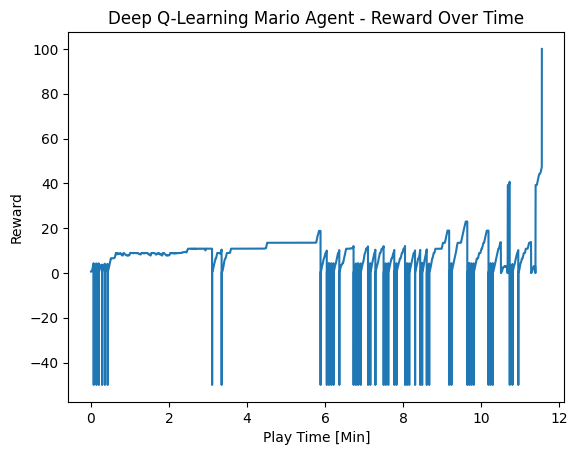

In [15]:
SEND_INTERVAL = 5


# Load the data file.
df = pd.read_csv("example-reward-log.csv")

# Add a data column for real world minutes.
df["minutes"] = (df["frame"] * SEND_INTERVAL / 60) / 60

# Truncate the max value to make the plot readable.
df['reward'] = df['reward'].clip(upper=100, lower=-50)

# Plot the reward as a function of time.
plt.plot(df["minutes"], df["reward"])
plt.xlabel("Play Time [Min]")
plt.ylabel("Reward")
plt.title("Deep Q-Learning Mario Agent - Reward Over Time")

# Show the plot.
plt.show()  

---

## 8. Discussion

**Interpretation of Results:**

Observing the agent in action provides clear visual confirmation that the network is capable of learning to play the game. If we watch for long enough, the agent is even able to complete the level! This behavior is mirrored quantitatively by the upward trend in reward over time. Note that every time the agent dies, reward is reset. But on the right half of the plot, it sis able to regain this reward much more quickly. Initially, the agent acts almost randomly, often failing to make significant progress. As training continues, it gradually discovers actions that increase its reward. However, performance remains inconsistent. Temporary drops in reward occur when the agent falls into pits or collides with enemies, interrupting its forward progress. 

These fluctuations indicate that while the model learned effective strategies, it has not yet achieved complete mastery of the game environment.

<br/>

**Error Analysis:**

Qualitative observations reveal that the agent struggles in specific situations. Particularly when moving left is required to continue making progress in the level. The agent is not able to overcome the short-term punishment to the reward function necessary to find long-term success. Some failures are likely due to limitations in the state representation, which captures only a fixed number of tiles around the player (the VISION_SIZE) and may miss relevant context for precise timing or positioning. 

<br/>

**Overfitting:**

Because the agent learns directly from gameplay experiences rather than a static dataset, traditional overfitting is less of a concern. However, the model can still over-specialize to specific patterns it encounters during training, potentially reducing performance on unseen levels. Early experiments indicate that reward improvements generalize reasonably well across similar layouts, but moving the agent to drastically different levels did not show success.

<br/>

**Limitations:**

The main limitations of this project include the state representation. As a developer, I decided what parameters the network would be able to "see". Had I chosen to give the network more or less information, results may have changed. Additionally, the reliance on reward shaping may bias behavior toward short-term gains. 

The biggest limitation are the computational constraints of training over long periods. The agent will play the game in real-time or close to real-time. This means that to collect a large sample of data, the agent must train for long periods of time. 

Finally, because training is conducted on a single game, results will not directly transfer to other games or platforms without additional adaptation.

<br/>

---

## 9. Conclusions & Future Work

**Summary:**

This project demonstrates that a Deep Q-Learning agent can learn to play Super Mario Bros on the NES, though wether the model can achieve full mastery remains an open question. By extracting the game state from the emulator and encoding it into a compact vector, the agent was able to interact with the environment and gradually improve its performance. Both visual observations and cumulative reward trends confirm that the agent learns to make forward progress and eventually complete levels, illustrating how complex behavior can emerge from simple reward signals.

<br/>

**Performance:**

Deep Q-Learning proved effective for this task, as its neural network approximation of the Q-function enabled the agent to generalize across diverse game states and identify action sequences that maximize long-term reward. While DQN performed well, alternative approaches such as NEAT may offer advantages in certain scenarios. Past NEAT based aproaches have also proven more effective at tackling this problem.

<br/>

**Future Work:**

Several avenues exist to extend this work. Combining multiple trained models or “breeding” networks that have learned complementary strategies could improve performance. Training networks over longer periods and on multiple levels would enhance generalization and robustness. Additionally, automated hyperparameter optimization could replace manual tuning, potentially yielding more efficient learning and higher-quality agents.

<br/>

---

## 10. References

1) https://en.wikipedia.org/wiki/Super_Mario_Bros
2) https://tasvideos.org/Bizhawk
3) https://www.researchgate.net/figure/Q-Learning-vs-Deep-Q-Learning-Difference-in-the-agents-brain-In-Q-learning-the_fig4_382675650
4) https://www.geeksforgeeks.org/deep-learning/convolutional-neural-network-cnn-in-machine-learning/
5) https://lunarmodules.github.io/luasocket/
6) https://github.com/Xander-Carroll/PHYSICS5680-Neural-Network-Final
